# Part I - US Accidents Exploration
## by Chidinma Okoro

## Introduction
This is a dataset that contains car accidents countrywide, covering 49 states within the USA. This data has been collected from February 2016 to December 2021 through the use of multiple APIs that collect streaming traffic incident data, from government or state departments of transportation, private data providers, enforcement agencies, traffic cameras, and traffic sensors that are utilized through the road-networks. This dataset contains currently about 2.8 million recorded observations, so it is a very large dataset to manage and manipulate.

The dataset in this project is retrieved from Kaggle at https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'

od.download(download_url)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [4]:
data_filename = './us-accidents/US_Accidents_Dec21_updated.csv'

In [5]:
#Load dataset into a pandas dataframe
us_accidents = pd.read_csv(data_filename)

# Assessing 

In [6]:
us_accidents.shape

(2845342, 47)

In [7]:
us_accidents.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [8]:
us_accidents.describe(include='O')

,ID,Start_Time,End_Time,Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,2845342,2845342,2845342,2845342,2845340,2845342,2845205,2845342,2845342,2844023,2845342,2841683,2835793,2794606,2771567,2774706,2842475,2842475,2842475,2842475
unique,2845342,1959333,2351505,1174563,159651,3,11681,1707,49,363085,1,4,2004,474214,24,127,2,2,2,2
top,A-1,2021-01-26 16:16:13,2021-11-22 08:00:00,A crash has occurred causing no to minimum del...,I-95 N,R,Miami,Los Angeles,CA,91761,US,US/Eastern,KCQT,2021-12-17 14:53:00,CALM,Fair,Day,Day,Day,Day
freq,1,214,88,7978,39853,2353309,106966,234122,795868,6162,2845342,1221927,52790,640,433622,1107194,1811935,1929103,2063472,2176983


In [9]:
us_accidents.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

Start_time and End_time have the wrong datatype(string) instead of datetime

In [10]:
#Check for duplicates
us_accidents.duplicated().sum()

0

In [11]:
#Check the percentage of missing values
missing_percent = (us_accidents.isna().sum().sort_values(ascending=False) / len(us_accidents)) * 100
missing_percent[missing_percent != 0]

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
dtype: float64

# Cleaning

Here, I will be cleaning my dataset for analysis. I will be dropping columns with over 50% missing values, columns not necessary for my analysis and column no longer needed after doing some extraction(Start_time, End_time).
- 'Number', 'Wind_Chill(F)' and 'Precipitation(in)' will be removed due to high percentage of missing values.

- 'End_Lat' and 'End_Lng' can be drooped since Start and End location would be almost.

- 

**1**. **Replacing** **missing** **values** **with** **median**

In [12]:
us_accidents["Temperature(F)"] = us_accidents["Temperature(F)"].fillna(us_accidents["Temperature(F)"].median())
us_accidents["Humidity(%)"] = us_accidents["Humidity(%)"].fillna(us_accidents["Humidity(%)"].median())
us_accidents["Visibility(mi)"] = us_accidents["Visibility(mi)"].fillna(us_accidents["Visibility(mi)"].median())

**2**. **Drop** **columns** **with** **too** **many** **missing** **data**

In [13]:
# Dropping some columns
us_accidents.drop(columns=['End_Lat', 'End_Lng', 'Number', 'Wind_Chill(F)', 'Precipitation(in)'], inplace=True)

**3**. **Drop** **columns** **not** **needed** **for** **analysis**

In [14]:
#dropping unnecessary columns
us_accidents.drop(columns=['ID', 'Country', 'Turning_Loop' , 'Nautical_Twilight', 'Civil_Twilight', 'Astronomical_Twilight', 'Weather_Timestamp', 'Airport_Code', 'Wind_Direction', 'Wind_Speed(mph)', 'Pressure(in)'], inplace=True)

**4**. **Drop** **missing** **rows**.

There are 137 Cities that are missing. I will drop these rows as it does not make sense to make these accidents happen in one city(i.e replacing missing values with the mode), and this is a huge dataset and I have more than 2.8 million data to do analysis.


In [15]:
#drop missing rows
us_accidents = us_accidents.dropna()

In [16]:
us_accidents.isnull().sum()

Severity             0
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Description          0
Street               0
Side                 0
City                 0
County               0
State                0
Zipcode              0
Timezone             0
Temperature(F)       0
Humidity(%)          0
Visibility(mi)       0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Sunrise_Sunset       0
dtype: int64

**4**. **Extracting** '**Year**', '**Month**', '**Weekday**', '**Day**' **and** '**Hour**' **from** **the** '**Start_time**' **attribute**  

In [17]:
#Splitting the 'Start_Time' column
us_accidents["Year"]=pd.DatetimeIndex(us_accidents["Start_Time"]).year
us_accidents["Month"]=pd.DatetimeIndex(us_accidents["Start_Time"]).month
us_accidents["Weekday"]=pd.DatetimeIndex(us_accidents["Start_Time"]).dayofweek
us_accidents["Hour"]=pd.DatetimeIndex(us_accidents["Start_Time"]).hour
us_accidents["Day"]=pd.DatetimeIndex(us_accidents["Start_Time"]).day



In [18]:
#function to assign the weekday to the corresponding week number
def weekday_text(w):
    day_of_week = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'};
    return day_of_week[w];
us_accidents['Weekday'] = us_accidents['Weekday'].apply(lambda x:weekday_text(x))
  

In [19]:
#Drop the 'Start_time' and 'End_Time' columns as they are no longer needed
us_accidents.drop(columns=['Start_Time', 'End_Time'], inplace=True)

In [20]:
#shape of the dataset after cleaning
us_accidents.shape

(2772449, 34)

In [21]:
us_accidents.head(5)

,Severity,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,County,State,...,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Year,Month,Weekday,Hour,Day
0,3,40.108910,-83.092860,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,R,Dublin,Franklin,OH,...,False,False,False,False,Night,2016,2,Monday,0,8
1,2,39.865420,-84.062800,0.747,At OH-4/OH-235/Exit 41 - Accident.,I-70 E,R,Dayton,Montgomery,OH,...,False,False,False,False,Night,2016,2,Monday,5,8
2,2,39.102660,-84.524680,0.055,At I-71/US-50/Exit 1 - Accident.,I-75 S,R,Cincinnati,Hamilton,OH,...,False,False,False,False,Night,2016,2,Monday,6,8
3,2,41.062130,-81.537840,0.123,At Dart Ave/Exit 21 - Accident.,I-77 N,R,Akron,Summit,OH,...,False,False,False,False,Night,2016,2,Monday,6,8
4,3,39.172393,-84.492792,0.500,At Mitchell Ave/Exit 6 - Accident.,I-75 S,R,Cincinnati,Hamilton,OH,...,False,False,False,False,Day,2016,2,Monday,7,8


### What is the structure of your dataset?

The US accidents data set originally has 2845342 rows and 47 columns. After cleaning, the data was reduced to 2772449 rows and 34 columns.

### What is/are the main feature(s) of interest in your dataset?

The main features are environmental factors that are responsible for accidents.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features of interest are factors that are attributed to accidents severity. Features such as Temperature, humidity .



# Univariate Exploration

In [22]:
#setting the color for the plots
color = sb.color_palette()[0]

### Which state have the highest number of accidents?

In [23]:
#get percentage of the top 10 states with the highest number of accidents
accidents_by_states = (us_accidents['State'].value_counts()/len(us_accidents['State'])) * 100
accidents_by_states

CA    28.015881
FL    14.327838
TX     5.281540
OR     4.474528
NY     3.860233
VA     3.823190
PA     3.540552
MN     3.443959
NC     3.239735
SC     3.151293
AZ     1.977421
MD     1.926203
TN     1.888908
NJ     1.873939
IL     1.694278
LA     1.675017
UT     1.612149
MI     1.575538
GA     1.418890
WA     1.163412
CT     1.068838
MO     1.047125
CO     0.894552
OH     0.871648
IN     0.740176
AL     0.686541
MT     0.544609
AR     0.381720
IA     0.335155
DC     0.314487
OK     0.314235
ID     0.290032
WI     0.282819
KS     0.271349
WV     0.269725
KY     0.235135
MA     0.221321
NV     0.218327
MS     0.188750
DE     0.173926
RI     0.154593
NH     0.137712
NE     0.115097
NM     0.083536
ME     0.077368
ND     0.063229
WY     0.034482
VT     0.012444
SD     0.006565
Name: State, dtype: float64

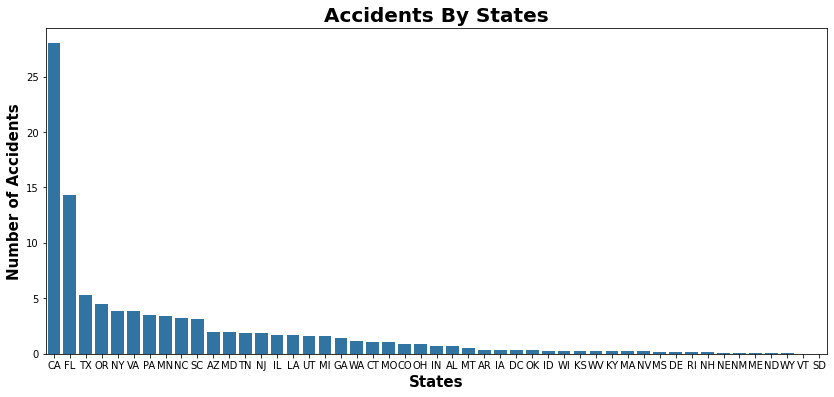

In [24]:
plt.figure(figsize=(14,6));
sb.barplot(accidents_by_states.index.values, accidents_by_states, color=color);
plt.xlabel('States', fontsize=15, weight='bold')
plt.ylabel('Number of Accidents', fontsize=15, weight='bold')
plt.title('Accidents By States', fontsize=20, weight='bold');
    


- In US, California is the state with highest no. of road accidents in past 6 years.

- Over 25% of the total accident records of past 6 years in US is only from California.

- Florida is the 2nd highest (14% cases) state for no. road accidents in US.

Now lets view the states that have recorded the least amount of accidents in the past 6 years.

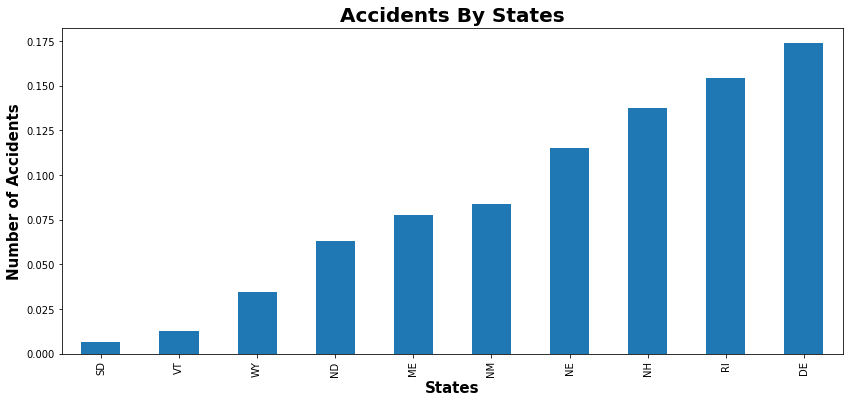

In [25]:
#zoom in on states with the lowest records
accidents_by_states.sort_values()[:10]
plt.figure(figsize=(14,6));
color = sb.color_palette()[0]
accidents_by_states.sort_values()[:10].plot(kind='bar', color=color)
plt.xlabel('States', fontsize=15, weight='bold')
plt.ylabel('Number of Accidents', fontsize=15, weight='bold')
plt.title('Accidents By States', fontsize=20, weight='bold');
    

- South Dakota(SD) recorded the least number of assident(0.007%) in the US followed by Vermont(VT 0.01%).

### What are the top ten cities with records of the highest number of accidents?

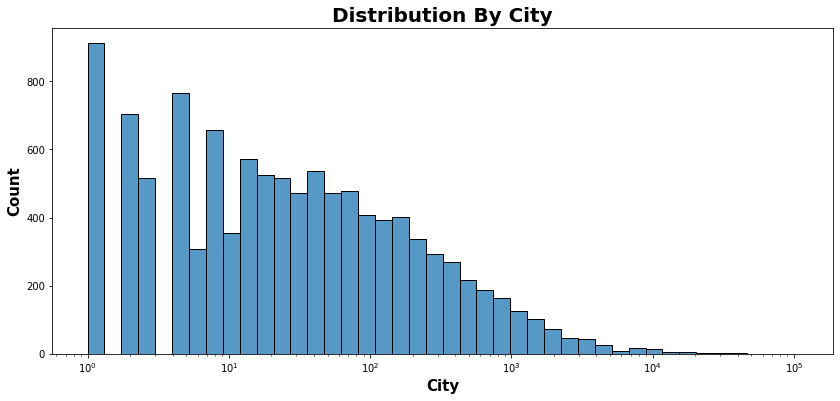

In [26]:
#first, lets see the distribution of city attribute
plt.figure(figsize=(14,6))
sb.histplot(us_accidents.City.value_counts(), log_scale=True)
plt.xlabel('City', fontsize=15, weight='bold')
plt.ylabel('Count', fontsize=15, weight='bold')
plt.title('Distribution By City', fontsize=20, weight='bold');
    

Over 1000 cities recorded just one accident from 2016 to 2021. This seems off and needs to be investigated.

Now lets get the top 10 cities with high number of accidents

In [27]:
#get a dataframe of top ten cities with the highest number of accidents
top_10_cities = pd.DataFrame(us_accidents['City'].value_counts()[:10]).reset_index().rename(columns={'index':'city', 'City':'cases_count'})
top_10_cities

,city,cases_count
0,Miami,106411
1,Los Angeles,68655
2,Orlando,54527
3,Dallas,41855
4,Houston,39173
5,Charlotte,33085
6,Sacramento,32505
7,San Diego,26525
8,Raleigh,22801
9,Minneapolis,22746


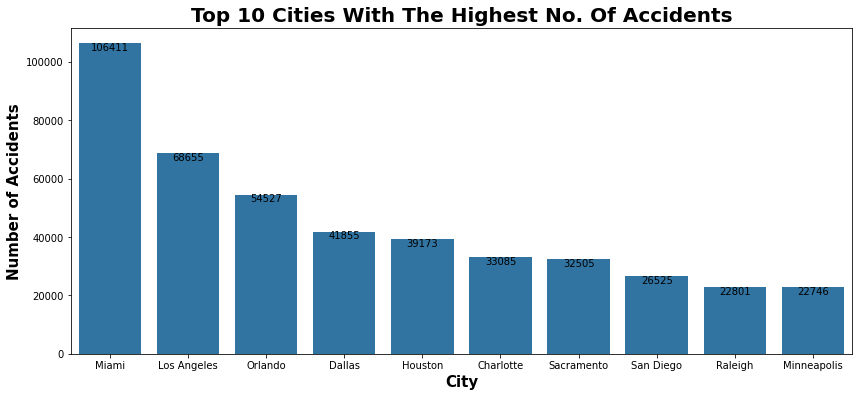

In [28]:
#plot a bar graph
plt.figure(figsize=(14,6));
color = sb.color_palette()[0]
sb.barplot(y=top_10_cities['cases_count'], x=top_10_cities['city'], color=color);
plt.title('Top 10 Cities With The Highest No. Of Accidents', fontsize=20, weight='bold');
plt.xlabel('City', fontsize=15, weight='bold')
plt.ylabel('Number of Accidents', fontsize=15, weight='bold')
#Add
for i in range (top_10_cities.shape[0]):
    count = top_10_cities.cases_count[i]
    plt.text(i, count+300, count, ha = 'center', va='top');    


From the above graph, Miami is the city with the highest ( no. of road accidents in US (2016-2021).followed by Los Angeles.


### What has been the trend of yearly car accidents?

In [29]:
us_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772449 entries, 0 to 2845341
Data columns (total 34 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Lat          float64
 2   Start_Lng          float64
 3   Distance(mi)       float64
 4   Description        object 
 5   Street             object 
 6   Side               object 
 7   City               object 
 8   County             object 
 9   State              object 
 10  Zipcode            object 
 11  Timezone           object 
 12  Temperature(F)     float64
 13  Humidity(%)        float64
 14  Visibility(mi)     float64
 15  Weather_Condition  object 
 16  Amenity            bool   
 17  Bump               bool   
 18  Crossing           bool   
 19  Give_Way           bool   
 20  Junction           bool   
 21  No_Exit            bool   
 22  Railway            bool   
 23  Roundabout         bool   
 24  Station            bool   
 25  Stop              

In [30]:
#get the records of accidents for each year
yearly_accidents=us_accidents["Year"].value_counts().reset_index()
yearly_accidents.columns=["Year","accidents"]
yearly_accidents

,Year,accidents
0,2021,1476957
1,2020,607271
2,2019,251463
3,2017,159437
4,2018,158200
5,2016,119121


In [31]:
#percentage of yearly accidents
(us_accidents["Year"].value_counts()/len(us_accidents["Year"])) * 100

2021    53.272648
2020    21.903775
2019     9.070068
2017     5.750764
2018     5.706146
2016     4.296598
Name: Year, dtype: float64

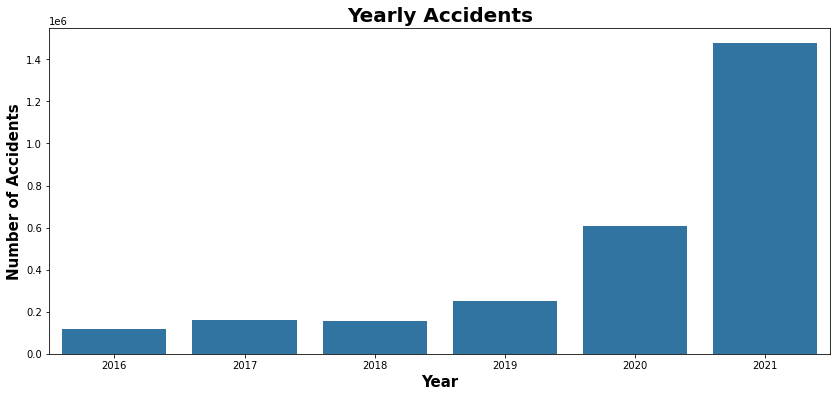

In [32]:
#get the records of accidents for each year
yearly_accidents=us_accidents["Year"].value_counts().reset_index()
yearly_accidents.columns=["Year","accidents"]

#plot a bar graph to display
plt.figure(figsize=(14,6));
sb.barplot(y=yearly_accidents['accidents'], x=yearly_accidents['Year'], color=color);
plt.xlabel('Year', fontsize=15, weight='bold')
plt.ylabel('Number of Accidents', fontsize=15, weight='bold')
plt.title('Yearly Accidents', fontsize=20, weight='bold');
       


- From the above graph, it is clear that in last 5 years (2016-2021) in US accidents percentage has increased significantly.

- Over 70% of the total road accident records of last 6 years happened only within last 2 years (2020, 2021).

- I driled further into each year to see the distribution of accidents to get more insight.

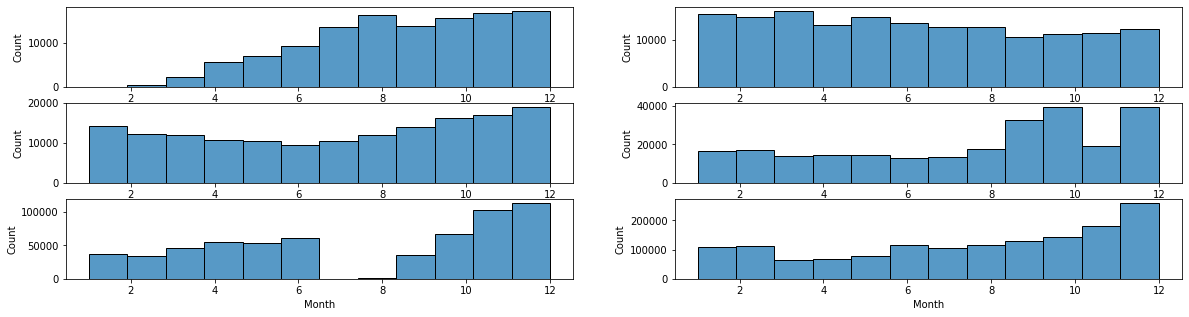

In [33]:
#plot side-by-side the distribution of each year(2016-2021)
# set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 
us_2016 = us_accidents[us_accidents['Year']==2016]
us_2017 = us_accidents[us_accidents['Year']==2017]
us_2018 = us_accidents[us_accidents['Year']==2018]
us_2019 = us_accidents[us_accidents['Year']==2019]
us_2020 = us_accidents[us_accidents['Year']==2020]
us_2021 = us_accidents[us_accidents['Year']==2021]
# histogram on left is the histogram for 2016 records
# 3 rows, 2 cols, subplot 1
plt.subplot(3, 2, 1) 
sb.histplot(us_2016.Month, bins=12, kde=False);

# histogram in the middle is the histogram for 2017 records
plt.subplot(3, 2, 2) # 3 row, 2 cols, subplot 2
sb.histplot(us_2017['Month'], bins=12, kde=False);

# histogram on right is the histogram for 2018 records
plt.subplot(3, 2, 3) # 3 row, 2 cols, subplot 3
sb.histplot(us_2018['Month'], bins=12, kde=False);

# histogram on right is the histogram for 2019 records
plt.subplot(3, 2, 4) # 3 row, 2 cols, subplot 4
sb.histplot(us_2019['Month'], bins=12, kde=False);

# histogram on right is the histogram for 2020 records
plt.subplot(3, 2, 5) # 3 row, 2 cols, subplot 5
sb.histplot(us_2020['Month'], bins=12, kde=False);

# histogram on right is the histogram for 2021 records
plt.subplot(3, 2, 6) # 3 row, 2 cols, subplot 3
sb.histplot(us_2021['Month'], bins=12, kde=False);



There are more accidents toward the end of the year. Drilling further, it was found that some data were missing in 2016 and 2020. 

Next, lets get the distribution of accidents during the week.

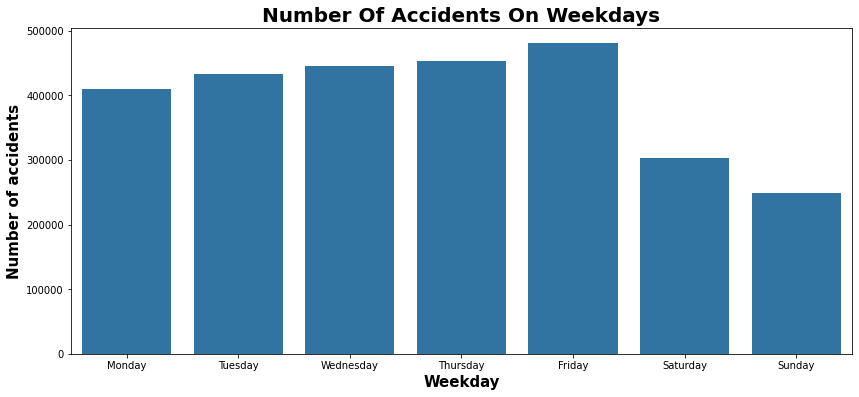

In [34]:
plt.figure(figsize=(14, 6))
sb.countplot(x="Weekday", data=us_accidents, color=color);
plt.title('Number Of Accidents On Weekdays', fontsize=20, weight='bold')
plt.xlabel('Weekday', fontsize=15, weight='bold')
plt.ylabel('Number of accidents', fontsize=15, weight='bold');

- Accidents are more common during the weekday with friday being the highest than weekends.

Now, lets look at the hourly distribution.

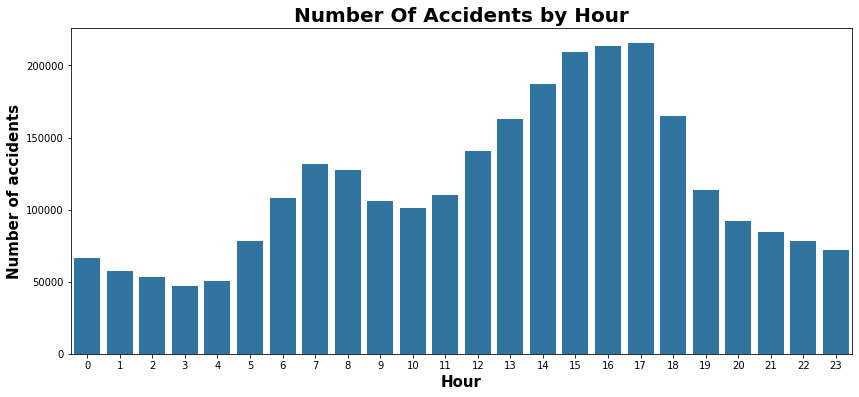

In [35]:
plt.figure(figsize=(14, 6))
sb.countplot(x='Hour', data=us_accidents, color=color);
plt.title('Number Of Accidents by Hour', fontsize=20, weight='bold')
plt.xlabel('Hour', fontsize=15, weight='bold')
plt.ylabel('Number of accidents', fontsize=15, weight='bold');

- A higher number of accidents occured between 4pm to 6pm

- Next high number of accidents occurred between 6am to 8am this could probably be because of the morning rush to get to work.



### What timezone recorded the highest number of accidents?

In [36]:
accidents_by_timezone = us_accidents['Timezone'].value_counts()
accidents_by_timezone

US/Eastern     1190305
US/Pacific      946974
US/Central      478656
US/Mountain     156514
Name: Timezone, dtype: int64

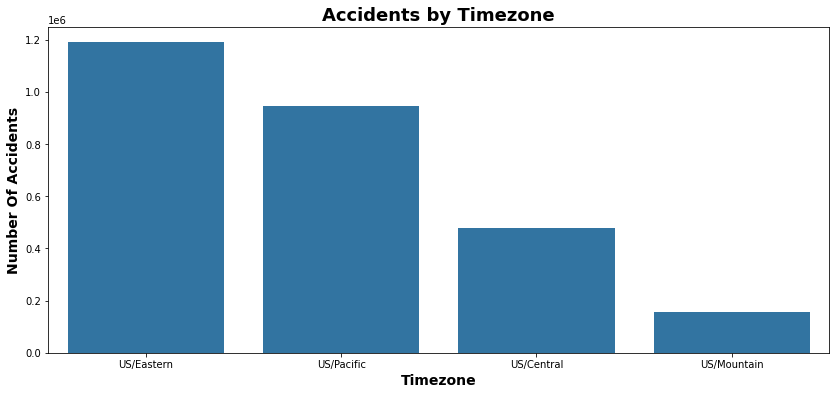

In [37]:
plt.figure(figsize=(14,6))
sb.countplot(us_accidents.Timezone, color=color);
plt.title('Accidents by Timezone',size=18, weight='bold')
plt.xlabel('Timezone',size=14, weight='bold')
plt.ylabel('Number Of Accidents', size=14, weight='bold');

- Over one million accidents have been recorded in the Eastern zone, making it the Timezone with the highest recorded accidents. And the mountain zone having recorded the lowest accidents.

### Whivh side of the road did most accident occur?

In [38]:
road_side_pie = us_accidents.groupby('Side').count()['City']
road_side_pie

Side
L     480865
R    2291584
Name: City, dtype: int64

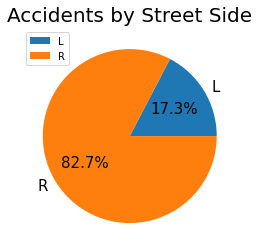

In [39]:
# Group by side and plot the result as a pie chart
mylabels = ["L", "R"]
plt.title("Accidents by Street Side",fontsize=20)
plt.pie(road_side_pie, labels = mylabels,autopct='%1.1f%%',textprops={'fontsize': 15});
plt.legend(mylabels, loc="best");

From the chart, it can be seen that 82.7% of the acidents(2016-2021) happened on the right side.

### How severe were the accidents?

In [40]:
us_accidents['Severity'].value_counts()

2    2469254
3     151145
4     126348
1      25702
Name: Severity, dtype: int64

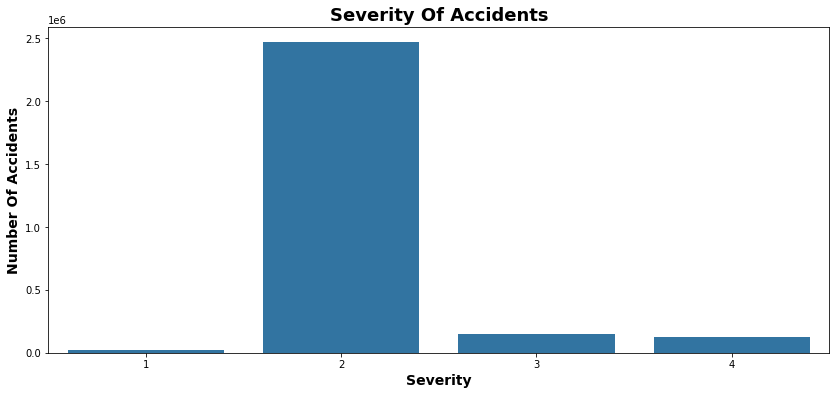

In [41]:
plt.figure(figsize=(14,6))
sb.countplot(us_accidents.Severity, color=color);
plt.title('Severity Of Accidents',size=18, weight='bold')
plt.xlabel('Severity',size=14, weight='bold')
plt.ylabel('Number Of Accidents', size=14, weight='bold');

The 'Severity' attribute shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

The graphs shows that most of the accidents did not delay the traffic.

In [42]:
accidents_by_weather = us_accidents['Weather_Condition'].value_counts()[:15]
accidents_by_weather

Fair                1106080
Mostly Cloudy        363759
Cloudy               348399
Partly Cloudy        249775
Clear                173817
Light Rain           128333
Overcast              84878
Scattered Clouds      45129
Light Snow            43664
Fog                   41192
Haze                  36334
Rain                  31031
Fair / Windy          15158
Heavy Rain            11816
Smoke                  7191
Name: Weather_Condition, dtype: int64

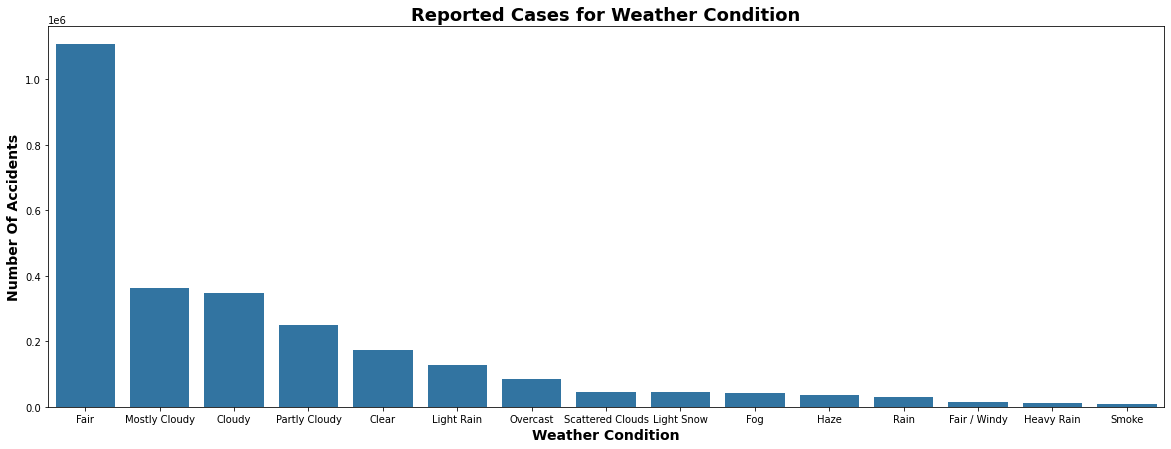

In [43]:
plt.figure(figsize=(20,7))
sb.barplot(accidents_by_weather.index.values, accidents_by_weather, color=color);
plt.title('Reported Cases for Weather Condition',size=18, weight='bold')
plt.xlabel('Weather Condition',size=14, weight='bold')
plt.ylabel('Number Of Accidents', size=14, weight='bold');

In this plot, it can be seen that most accidents happent under fair weather condition.

Now, lets take a look at temperature:

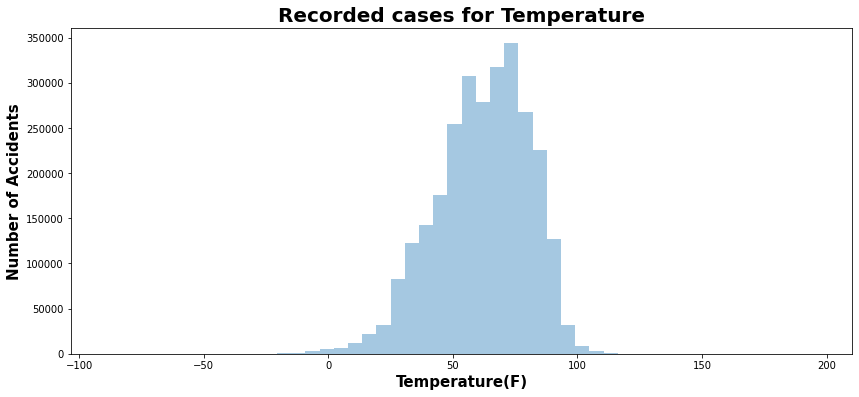

In [44]:
#plot to see the distribution of temperature
fig, ax = plt.subplots(figsize = (14,6))
sb.distplot(a=us_accidents["Temperature(F)"],kde=False) ;
plt.title('Recorded cases for Temperature', fontsize=20, weight='bold');
plt.ylabel('Number of Accidents', fontsize=15, weight='bold')
plt.xlabel('Temperature(F)', fontsize=15, weight='bold');

- The temperature is follows a normal distribution.

- More car accidents happened at the temperature around 50-80 F degree.

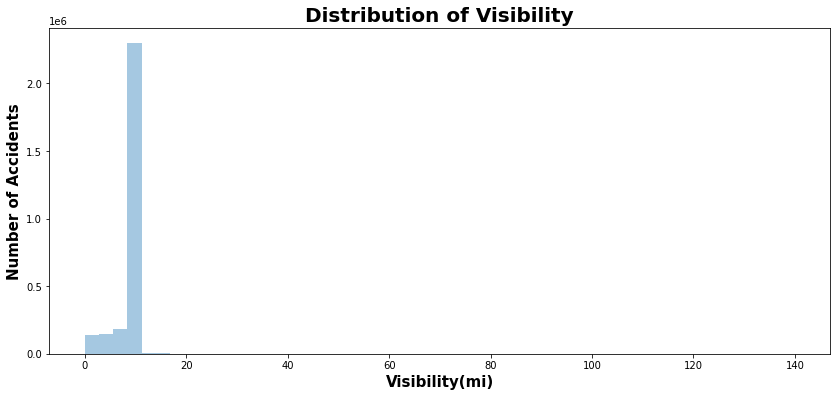

In [45]:
fig, ax = plt.subplots(figsize = (14,6))
sb.distplot(a=us_accidents["Visibility(mi)"],kde=False) ;
plt.title('Distribution of Visibility', size=20, weight='bold');
plt.ylabel('Number of Accidents', fontsize=15, weight='bold')
plt.xlabel('Visibility(mi)', fontsize=15, weight='bold');

- More accidents happended when visibility is low.

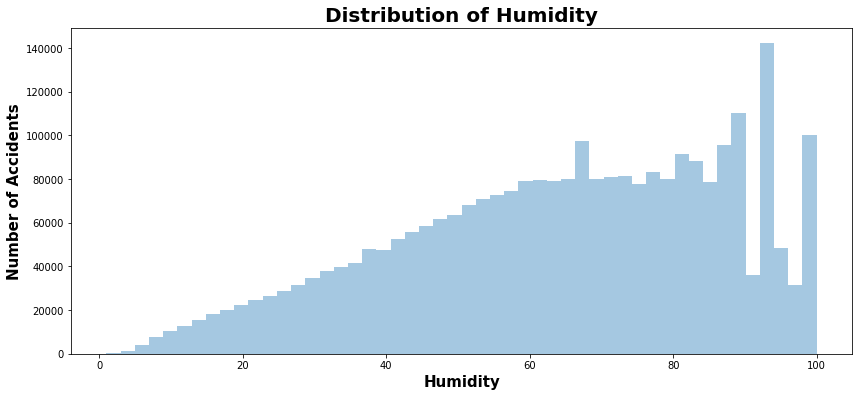

In [46]:
fig, ax = plt.subplots(figsize = (14,6))
sb.distplot(a=us_accidents["Humidity(%)"],kde=False) ;
plt.title('Distribution of Humidity', fontsize=20, weight='bold');
plt.ylabel('Number of Accidents', fontsize=15, weight='bold')
plt.xlabel('Humidity', fontsize=15, weight='bold');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Due to the assessing & cleaning efforts, there weren't any suprises that I came across during the exploratory and visualization phases. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

In the city distribution, over 1000 cities only recorded 1 accident in the span of 6 years. 

## Bivariate Exploration


### What is the relationship between some features and the severity of the accidents?

In [47]:
#get a subset of the data by random sampling to help reduce overplotting
sample_data = us_accidents.sample(int(0.01 * len(us_accidents)))
sample_data

,Severity,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,County,State,...,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Year,Month,Weekday,Hour,Day
2622566,2,42.242860,-85.565800,0.316,At Portage St/Exit 78 - Accident. Left lane bl...,Officer Eric Zapata Memorial Highway E,R,Portage,Kalamazoo,MI,...,False,False,False,False,Day,2018,8,Friday,18,17
961755,2,44.108248,-92.515472,0.144,Incident on MN-52 SB near 75TH ST NW Drive wit...,75th St NW,R,Oronoco,Olmsted,MN,...,False,False,False,False,Day,2021,4,Sunday,7,4
769166,2,33.496233,-112.043923,2.039,Slow traffic on AZ-51 S from Highland Ave (AZ-...,Piestewa Fwy S,R,Phoenix,Maricopa,AZ,...,False,False,False,False,Day,2021,12,Wednesday,15,8
2196958,2,45.639100,-118.684730,0.000,At OR-331/Market Rd/Exit 216 - Accident.,Old Oregon Trail Hwy No 6,R,Pendleton,Umatilla,OR,...,False,False,False,False,Day,2020,3,Tuesday,13,3
486502,2,39.467382,-121.526420,0.044,Incident on LOWER WYANDOTTE RD near OPHIR RD D...,Lower Wyandotte Rd,L,Oroville,Butte,CA,...,False,False,False,False,Day,2021,12,Friday,15,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534527,2,37.014660,-121.572380,0.000,At Monterey Rd - Accident.,1st St,R,Gilroy,Santa Clara,CA,...,False,False,False,True,Day,2019,1,Monday,7,7
281352,2,32.579766,-93.897260,0.029,Incident on W ALEXANDER near WILLIAMS ST Drive...,W Alexander Ave,R,Shreveport,Caddo,LA,...,False,False,False,False,Night,2021,6,Saturday,20,12
2718548,4,43.087220,-77.609220,0.289,Closed at I-390 - Road closed due to accident.,E Henrietta Rd,R,Rochester,Monroe,NY,...,False,False,False,True,Day,2017,12,Friday,12,15
1276377,2,34.018412,-117.550494,4.238,Slow traffic on I-15 S - Ontario Fwy S from Ju...,I-15 S,R,Mira Loma,Riverside,CA,...,False,False,False,False,Day,2021,12,Thursday,14,9


In [48]:
#define a function that plo

def regplot(df, xVar, yVar, x_jitter=0.4, size=5, lcolor='red', discrete=True):
  ''' This function plots a scatter plot of the arguments passed in as parameters '''

  #set plot dimensions
  plt.figure(figsize=[14, 6])
  
  #plot
  ax=sb.regplot(data=df, x=xVar, y=yVar, x_jitter=x_jitter, scatter_kws={'s':size}, line_kws={'color':lcolor});
  #if discreet, set discrete tick labels
  if discrete:
    xticks=sorted(df[xVar].unique())
    plt.xticks(range(1,len(xticks)+1), xticks)

  #add labels
  xVar=xVar.replace('_', ' ')
  yVar=yVar.replace('_', ' ')
  #add title
  ax.set_title(f'Relationship between {xVar} and {yVar}'.title(), fontsize=20, weight='bold')
  #add x label
  ax.set_xlabel(xVar.title(), fontsize=15, weight='bold')
  #add y label
  ax.set_ylabel(yVar.title(), fontsize=15, weight='bold')


#### Temperature vs Severity

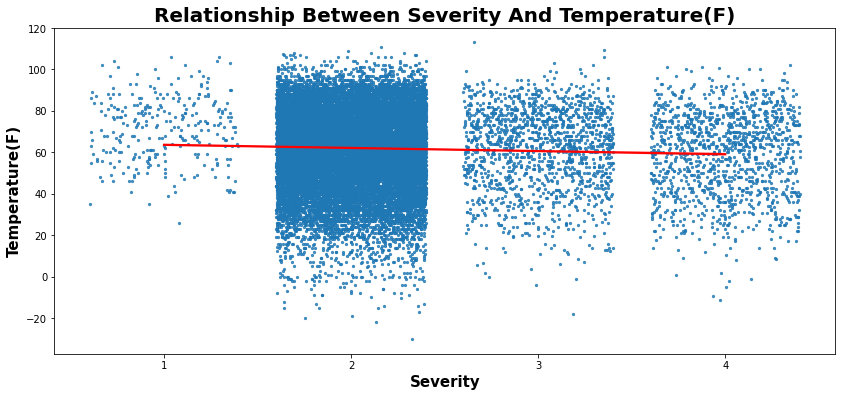

In [49]:
#call plot function to analysing the relationship between 'Temperature(F)' attribute on 'Severity' attribute with scatter plot
regplot(sample_data,'Severity', 'Temperature(F)');

This scatter plot showed that temperature does not have much  impact on the severity of the accident. However, extreme weather temperature, like below -50 F degree, usually only causes accidents that have a severity score of 2.

#### Visibility Vs Severity

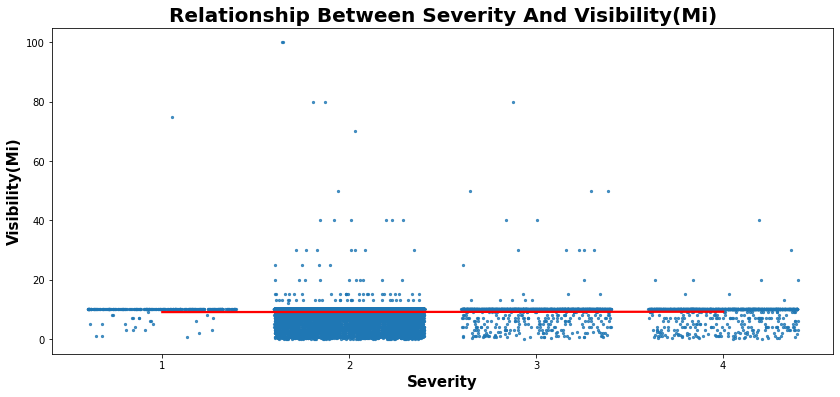

In [50]:
#call plot function to analysing the relationship between 'Visibility(mi)' attribute on 'Severity' attribute with scatter plot
regplot(sample_data,'Severity', 'Visibility(mi)');

Severe car accidents are mostly accompanied with low visibility. Visibility has an impact on severity of accidents.

#### Humidity Vs Severity

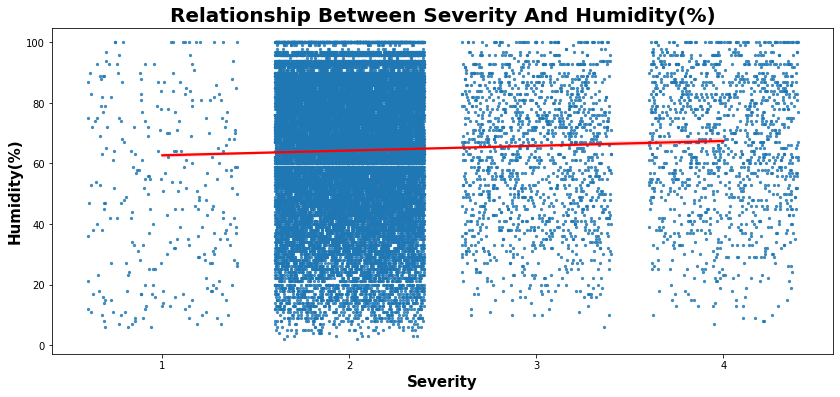

In [51]:
#call plot function to analysing the relationship between 'Temperature(F)' attribute on 'Severity' attribute with scatter plot
regplot(sample_data,'Severity', 'Humidity(%)');

It is observed that the number of accidents increases as the number of humidity increases.

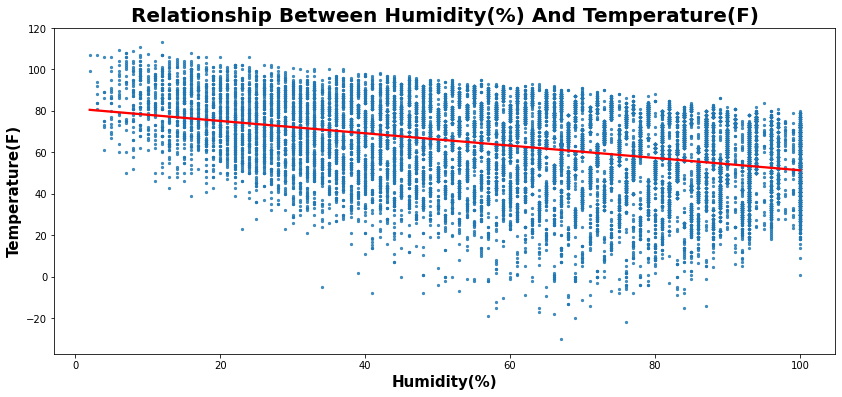

In [52]:
#call plot function to analysing the relationship between 'Temperature(F)' and 'Humidity' attribute with scatter plot
regplot(sample_data, 'Humidity(%)', 'Temperature(F)', x_jitter=0, discrete=False);

There is a negative relationship between temperature and humidity. As the temperature increases, the humidity decreases.

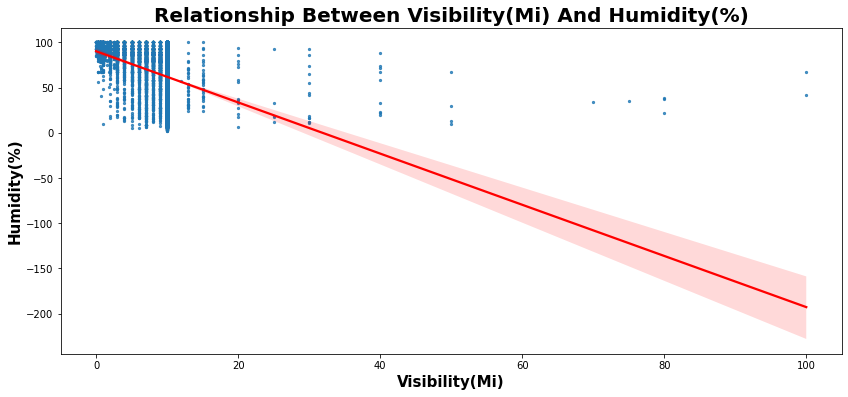

In [53]:
#Relationship between humidity and visibility
regplot(sample_data, 'Visibility(mi)', 'Humidity(%)', x_jitter=0, discrete=False)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

This section enhanced the previous topics of data exploration through different visuals and adding in more variables to compare to other variables. Plotting a scatter plot of ;Temperature', 'Humidity', and 'Visibility' versus the severity revealed how these factors affect the severity of accidents.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The relationship between temperature, humidty and visibility was observed. 

## Multivariate Exploration


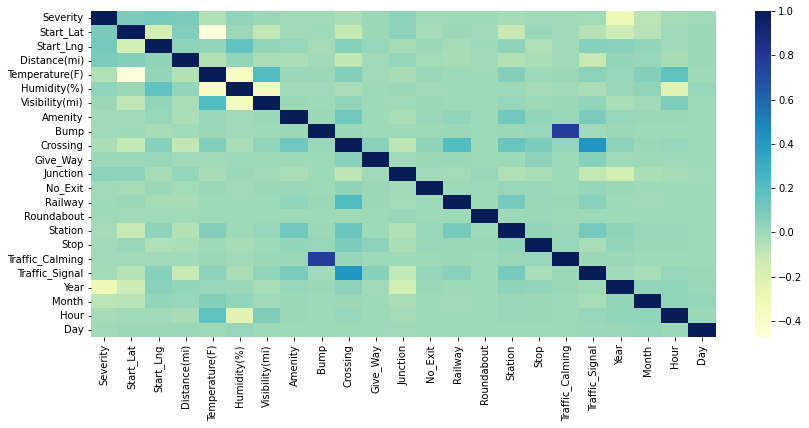

In [54]:
#plotting the correlation of the entire dataset.
plt.figure(figsize=(14,6))
sb.heatmap(us_accidents.corr(), cmap="YlGnBu", annot=False)
plt.show()

The correlation of the dataset is low overall. There are some variables with no correlation.

#### Severity of accident by Temperature during Night and Day

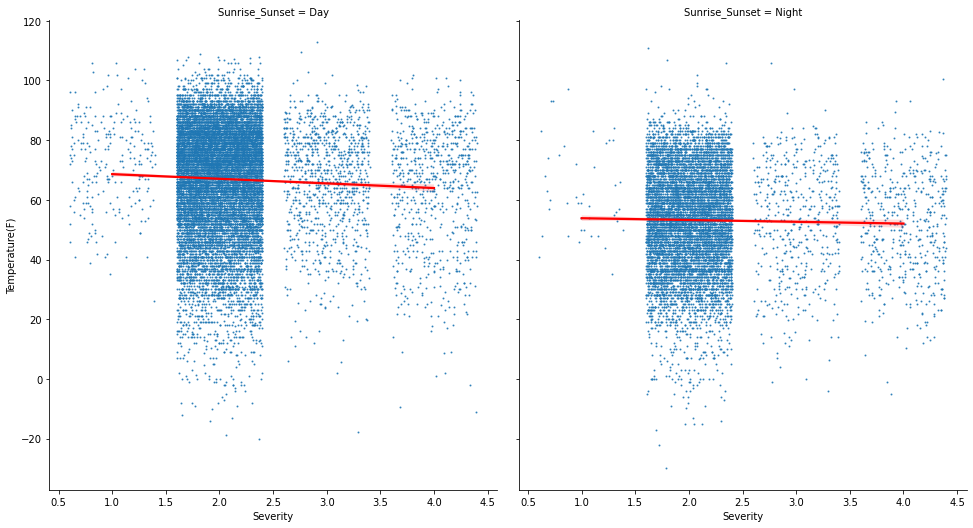

In [55]:
#use seaborn's facetgrid to compare the severity of accidents by temperature during the day vs night.
g = sb.FacetGrid(data=sample_data, col= 'Sunrise_Sunset', size=5)
g.map(sb.regplot, 'Severity', 'Temperature(F)', x_jitter=0.4, scatter_kws={'s':1}, line_kws={'color':'red'});
g.fig.set_size_inches(14, 8);

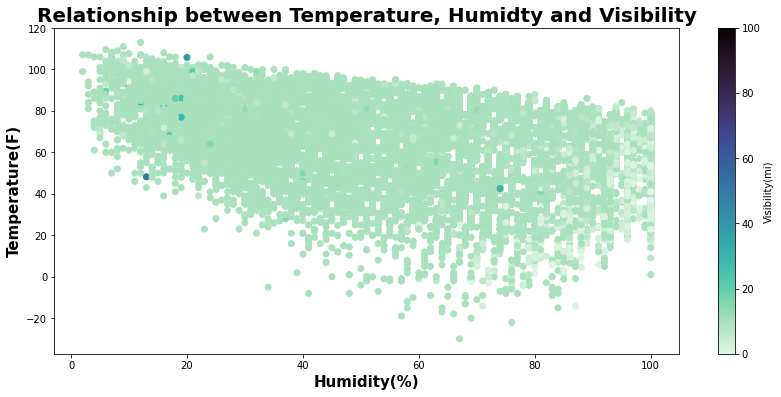

In [56]:
plt.figure(figsize=[14, 6])
plt.scatter(data = sample_data, x = 'Humidity(%)', y = 'Temperature(F)', c = 'Visibility(mi)',
            cmap = 'mako_r');
plt.colorbar(label= 'Visibility(mi)')
plt.title('Relationship between Temperature, Humidty and Visibility', fontsize=20, weight='bold')
plt.ylabel('Temperature(F)', fontsize=15, weight='bold')
plt.xlabel('Humidity(%)', fontsize=15, weight='bold');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Plotting a heat map of the entire dataset showed that low correlation. Features such as bump and traffic calming strengthened each other. There is also relation ship between temperature and the hour of the day though the correlation is not that high.

### Were there any interesting or surprising interactions between features?
There were no suprising interactions between features.


## Conclusions
- This dataset has data for 49 states in the US. There is no data for New York. 
-  In US, California is the state with highest no. of road accidents in past 6 years. This makes ense as California is the most populated US state. Over 25% of the total accident records of past 6 years in US is only from California.

- Florida is the 2nd highest (14% cases) state for no. road accidents in US.

- Over 1000 cities recorded just one accident from 2016 to 2021. This seems off and needs to be investigated.
Less than 5% of the cities have recorded more than 1000 accidents. 

- Accidents have peaked ever since the emergence of COVID, and has continued to increase exponentially. This increase is suprising. The reason for the surge may be due to the absense traffic officers.

- A higher percentage of accidents occured between 1pm to 6pm, this could be as a result of closing hours and everybody is rushing to get home.

- Next high percentage of accidents occurred between 6am to 8am this could probably be because of the morning rush to get to work. Accidents are more common during the weekday with friday being the highest than weekends.

- Extreme temperature do result in more severe accidents. High number of accidents occured under moderate temperature.



## Reference

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.